In [1]:
#PROJECT FOR DATA ANALYSIS BY RISHABH SINGH

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('zomato.csv',encoding='latin-1') #ISO-8859-1
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
data['Cuisines']=data['Cuisines'].fillna('NaN')
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
data1=pd.read_excel('Country_Code.xlsx')
data1.head(10)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
#Joining data from both the files
final_data=pd.merge(data,data1,on='Country Code',how='left')
final_data.head(20)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [7]:
final_data.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [8]:
d1=final_data.Country.value_counts().reset_index()
d1.head()

,Country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,UAE,60


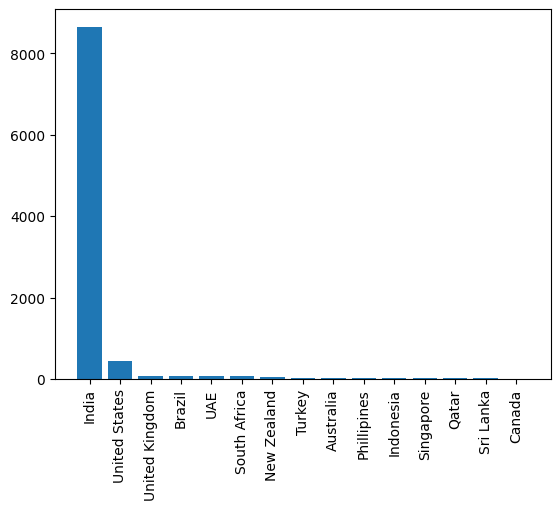

In [9]:
#Making a bar chart of # of restaurants per country
plt.bar(d1['Country'],d1['count'])
plt.xticks(rotation=90)
plt.show()

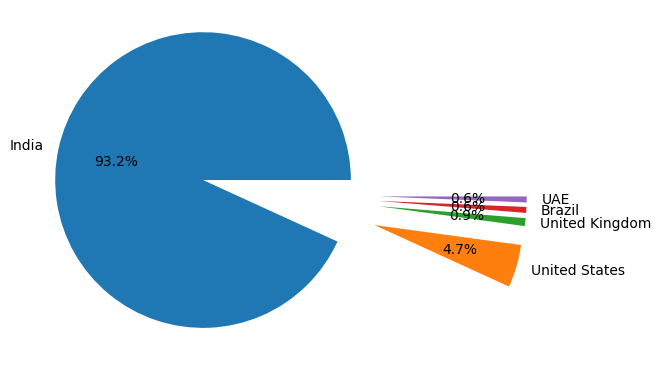

In [10]:
#Pie chart for top 5 countries
plt.pie(d1['count'][:5],labels=d1['Country'][:5],autopct='%1.1f%%',explode=[0.45,0.75,0.75,0.75,0.75])
plt.show()

In [11]:
country_name=final_data.Country.value_counts().index
country_value=final_data.Country.value_counts().values

In [12]:
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [13]:
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

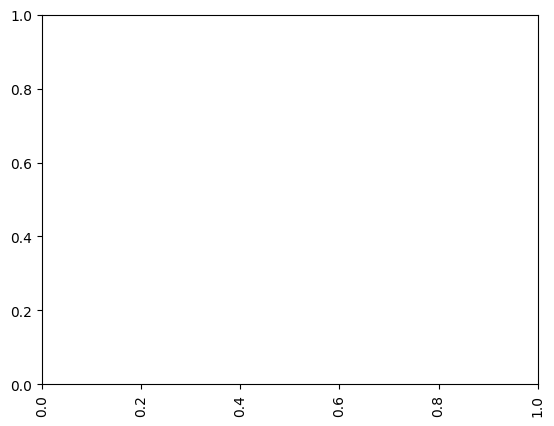

In [14]:
#Using plotly to do the same
px.bar(x=country_name,y=country_value)
plt.xticks(rotation=90)
plt.show()

In [15]:
px.pie(labels=country_name,values=country_value,width=700,height=700)

In [16]:
rating=final_data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [17]:
d2=final_data['Rating color'].value_counts().reset_index()
d2

,Rating color,count
0,Orange,3737
1,White,2148
2,Yellow,2100
3,Green,1079
4,Dark Green,301
5,Red,186


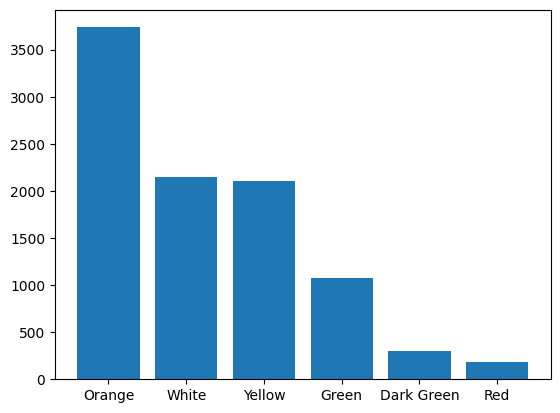

In [18]:
#bar plot
plt.bar(d2['Rating color'],d2['count'])
plt.show()

([<matplotlib.patches.Wedge at 0x7fceff2f06d0>,
 [Text(0.3684861700797763, 1.0364448574140055, 'Orange'),
  Text(-1.0997000414954674, -0.02568693704721014, 'White'),
  Text(-0.16455128028787028, -1.087622579829797, 'Yellow'),
  Text(0.8585786329981524, -0.6876356091412253, 'Green'),
  Text(1.0731576417576685, -0.24152158482653235, 'Dark Green'),
  Text(1.0979419528893613, -0.06725673264065082, 'Red')],
 [Text(0.2009924564071507, 0.5653335585894576, '39.1%'),
  Text(-0.5998363862702549, -0.014011056571205528, '22.5%'),
  Text(-0.08975524379338379, -0.5932486799071619, '22.0%'),
  Text(0.4683156179989922, -0.3750739686224865, '11.3%'),
  Text(0.5853587136860009, -0.13173904626901764, '3.2%'),
  Text(0.5988774288487424, -0.03668549053126408, '1.9%')])

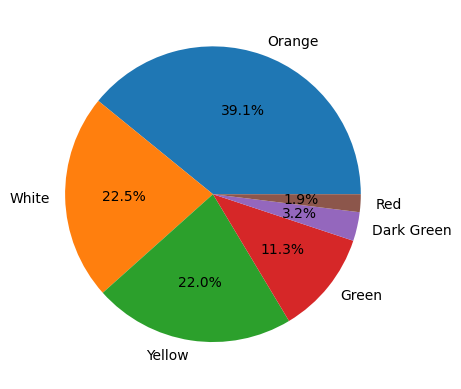

In [19]:
#pie chart
plt.pie(final_data['Rating color'].value_counts(),labels=final_data['Rating color'].value_counts().index,autopct='%1.1f%%')

In [20]:
#Plotting using plotly
fig=px.bar(rating,x='Rating color',color='Rating text',y='Rating Count',
             color_discrete_sequence=['White','Red','Orange','Yellow','Green','Darkgreen'],text='Rating Count',
             title='Rating distribution')
fig.update_layout(bargap=0.1)
fig.show()

<Axes: xlabel='Rating color', ylabel='Rating Count'>

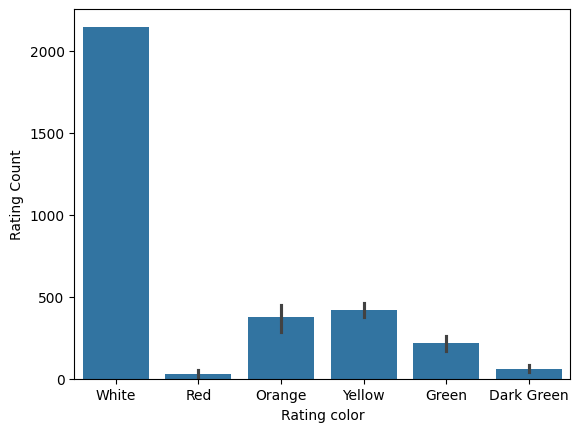

In [21]:
sns.barplot(x='Rating color',y='Rating Count',data=rating)

In [22]:
No_rating=final_data[final_data['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


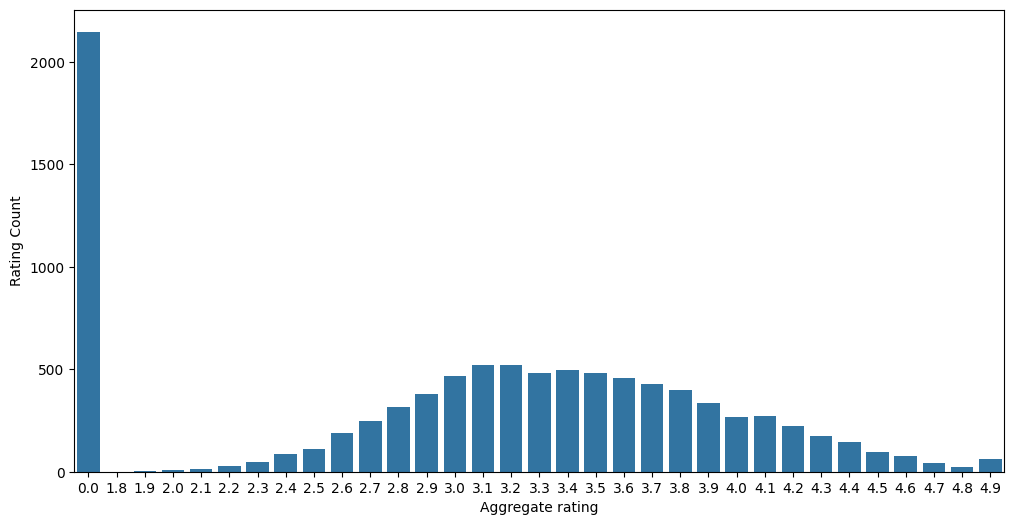

In [23]:
#Bar chart of rating distribution
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating Count',data=rating)
plt.show()

In [24]:
#Bar chart of rating distribution
px.bar(x=rating['Aggregate rating'],y=rating['Rating Count'],text=rating['Rating Count'])

In [25]:
#percentage of countries having online delivery
fig= px.pie(final_data,names='Has Online delivery',title='Online Deliveries')
fig.show()

In [26]:
country_online_del=final_data[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index(name='Count')
country_online_del

,Has Online delivery,Country,Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [28]:
#Filtering out cuisines with excellent ratings
good_cuisine=final_data.loc[final_data['Rating text'].isin(['Excellent'])]
good_cuisine=good_cuisine.Cuisines.value_counts().reset_index().head(25)

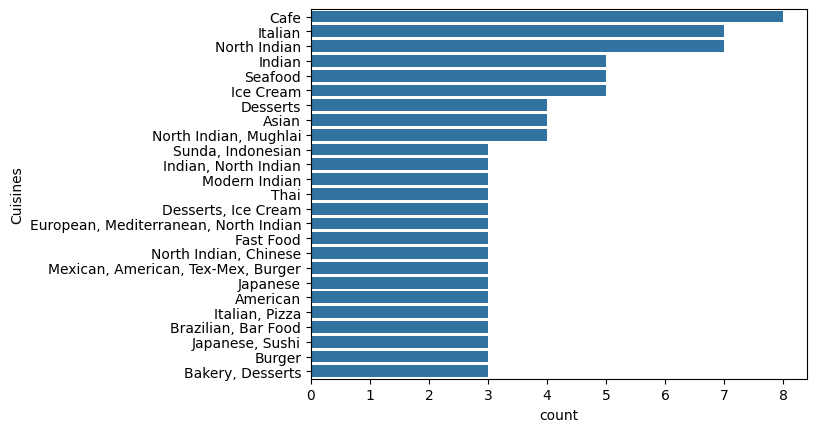

In [30]:
sns.barplot(x='count',y='Cuisines',data=good_cuisine)
plt.show()

In [31]:
#Top 25 costliest restaurants
costly_zomato=final_data.nlargest(25,'Average Cost for two')
costly_zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,No,No,No,No,3,4.1,Green,Very Good,1498,Indonesia
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,No,No,No,No,3,4.6,Dark Green,Excellent,873,Indonesia
9287,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,No,No,No,No,3,4.9,Dark Green,Excellent,605,Indonesia
9289,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,No,No,No,No,3,4.2,Green,Very Good,395,Indonesia
9294,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,No,No,No,No,3,4.3,Green,Very Good,243,Indonesia
9288,18352452,Lucky Cat Coffee & Kitchen,94,Jakarta,"Plaza Festival, South Parking, Jl. HR Rasuna S...","Plaza Festival, Kuningan","Plaza Festival, Kuningan, Jakarta",106.831748,-6.218932,"Cafe, Western",...,No,No,No,No,3,4.3,Green,Very Good,458,Indonesia
9295,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,...,No,No,No,No,3,3.7,Yellow,Good,155,Indonesia
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",...,No,No,No,No,3,4.0,Green,Very Good,1159,Indonesia
9285,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,259,Indonesia
9279,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",...,No,No,No,No,3,4.9,Dark Green,Excellent,1662,Indonesia


In [33]:
#Plotting
fig=px.bar(costly_zomato,x='Restaurant Name',y='Average Cost for two',color='City',text='Average Cost for two',
           title='Costliest restaruants for 2 people')
fig.update_layout(bargap=0.1)
fig.show()

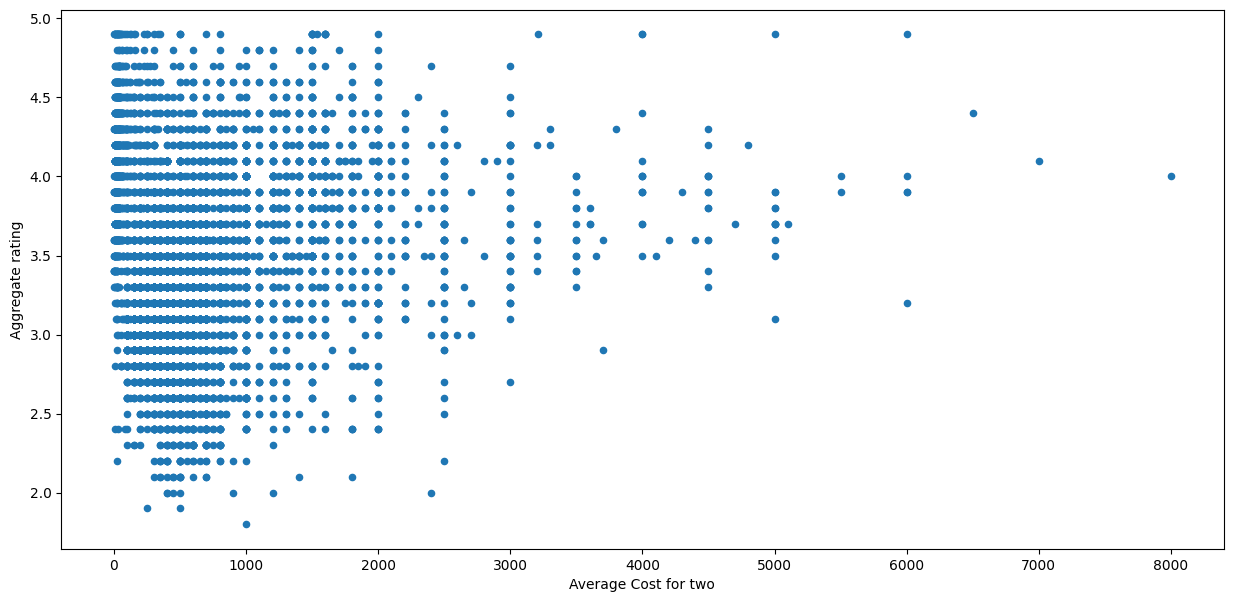

In [39]:
#scatter graph
final_data[(final_data['Average Cost for two']<10000)&(final_data['Aggregate rating']!=0)].plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(15,7))
plt.show()

In [41]:
Delhi=final_data[(final_data.City=='New Delhi')]
fig=px.bar(x=Delhi.Locality.value_counts().head(10).index,y=Delhi.Locality.value_counts().head(10),text=Delhi.Locality.value_counts().head(10))
fig.show()

In [43]:
#Top 10 cuisines available
cuisine_val=final_data.Cuisines.value_counts()
cuisine_label=final_data.Cuisines.value_counts().index
fig=px.pie(labels=cuisine_label[:10],values=cuisine_val[:10])
fig.show()

Text(0.5, 1.0, 'Restaurants with online delivery')

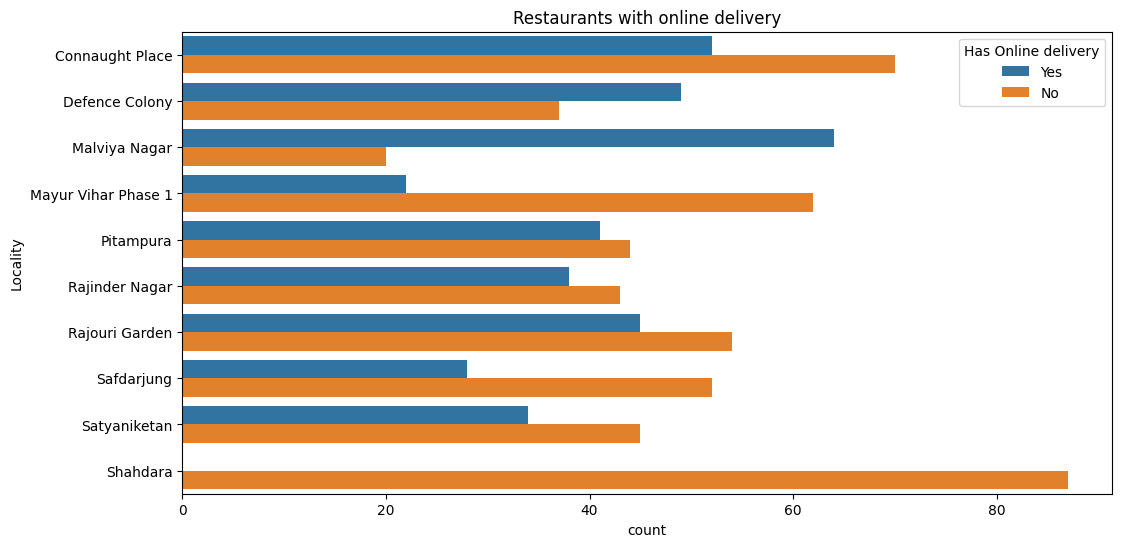

In [44]:
top_locality=Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(y='Locality',hue='Has Online delivery',data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Restaurants with online delivery')